In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
ls

drive/  sample_data/


In [5]:
cd drive/My Drive

/content/drive/My Drive


In [0]:
# Importing the modules

import sklearn
import librosa
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 14,5

audio_path = 'GTZAN/Jazz/Jazz jazz.00000.wav'

x, sr = librosa.load(audio_path)

In [8]:
print(f"Dimensions of audio file converted to array: {x.shape}")
print(f"Sampling Rate: {sr}")

Dimensions of audio file converted to array: (661794,)
Sampling Rate: 22050


In [10]:
#Playing audio sample using Ipython.display.audio

import IPython.display as ipd
ipd.Audio(audio_path, rate=sr)

In [11]:
import IPython.display as ipd
ipd.Audio('GTZAN/Hiphop/Hiphop hiphop.00003.wav', rate=sr)

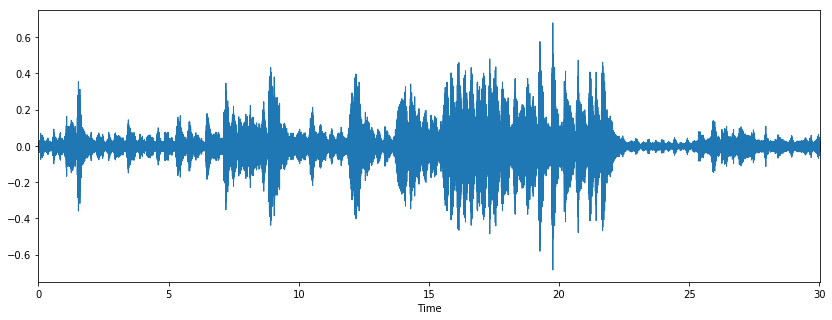

In [12]:
# Plotting the waveform of audio array using librosa

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr=sr)

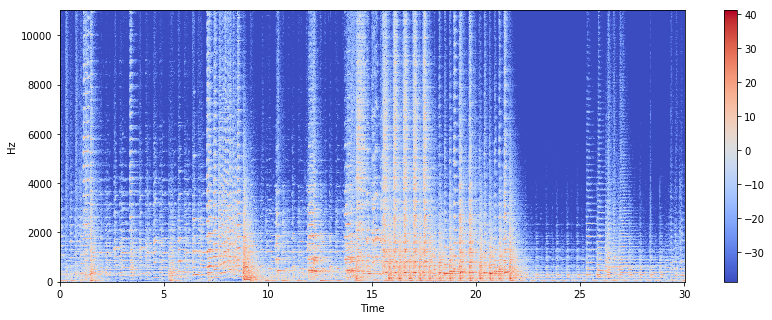

In [13]:
# Spectrogram : A visual representation of spectrum of frequencies of sound as they vary with time

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

**Zero Crossing Rate**

 It is the rate of sign changes along a signal
 i.e the rate at which signal changes from positive to negative and so on...

 This feature of audio is really powerful and has been used in many areas like speech recognition 
 and Music Information Retrieval

 It usually shows higher values for metal rock songs... 

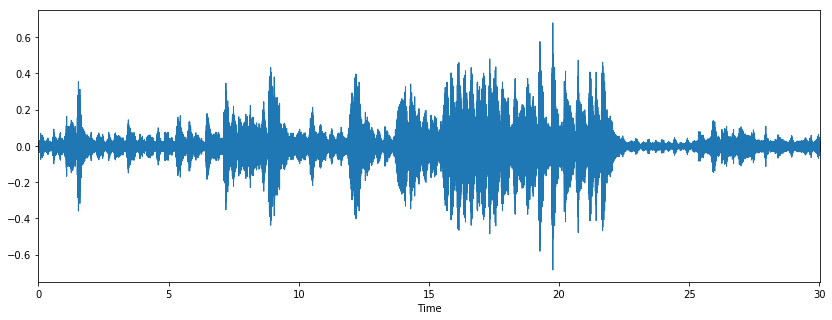

In [14]:
# Load the signal
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

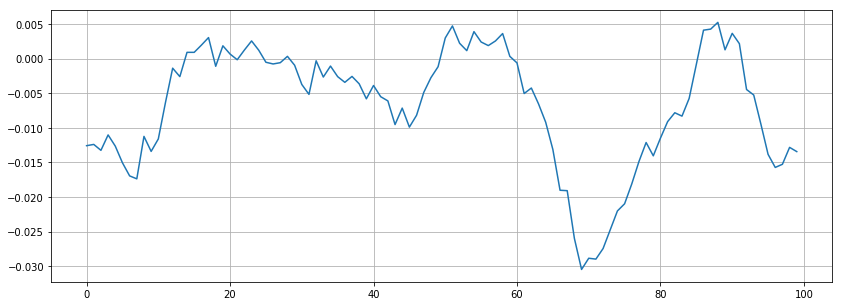

In [15]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [16]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

12


 **Spectral Centroid**

It indicates where the "centre of mass" of sound is located
It is calculated as the weighted mean of frequencies present in the sound

 For blues song which is same throughout its length the spectral centroid is at the centre
 while for metal song it is towards the end as its major frequencies are towards the end

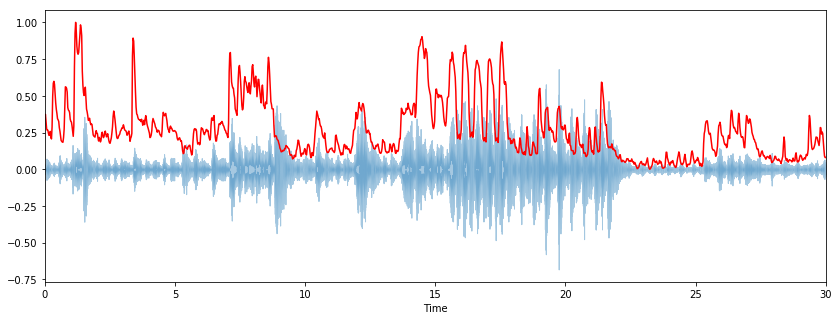

In [19]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

**Spectral Rolloff**

It is a measure of shape of signal

It represents a freq below which a specified percentage of spectral energy lies, e.g 85%

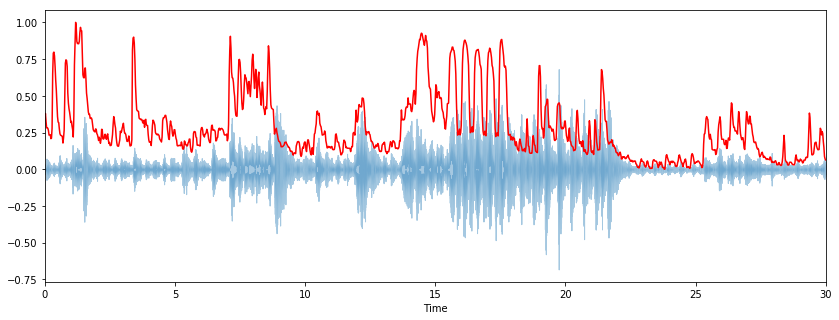

In [20]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

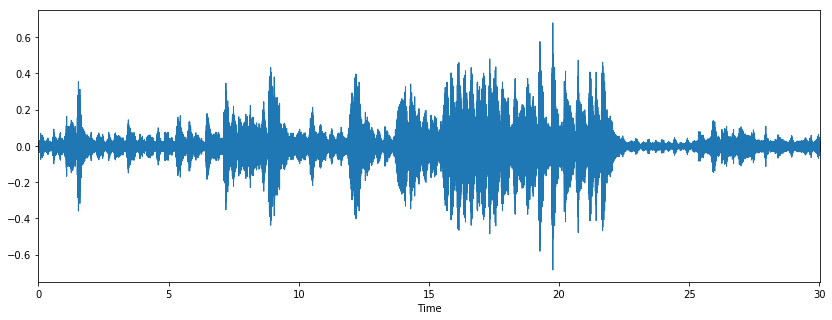

In [21]:
# Mel-Frequency Cepstral Coefficients (MFCC)

# these are small set of signals which describe the overall shape of the spectral envelope

x, fs = librosa.load(audio_path)
librosa.display.waveplot(x, sr=sr)

(20, 1293)


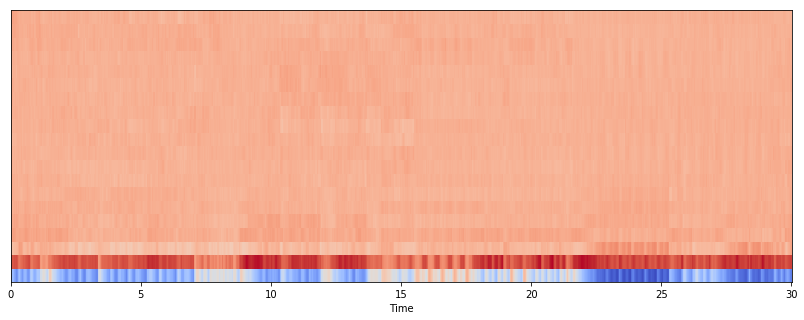

In [22]:

mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

[-7.41865965e-17 -1.05449721e-15 -8.49539567e-16 -7.09581058e-16
  0.00000000e+00 -2.01877271e-16  4.19274480e-16  4.72510232e-16
 -1.97006629e-15 -3.02928603e-16  1.44543653e-15 -1.05290873e-16
  2.51624793e-16 -3.14863715e-16  8.00768749e-16 -2.61198642e-16
 -1.62970093e-16 -3.56089224e-16  2.11934105e-16 -1.39872646e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


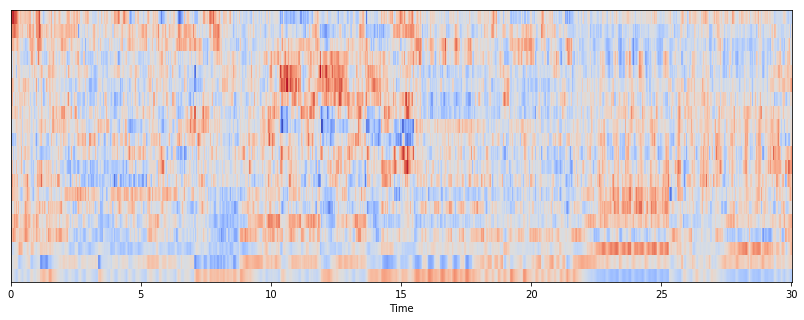

In [23]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

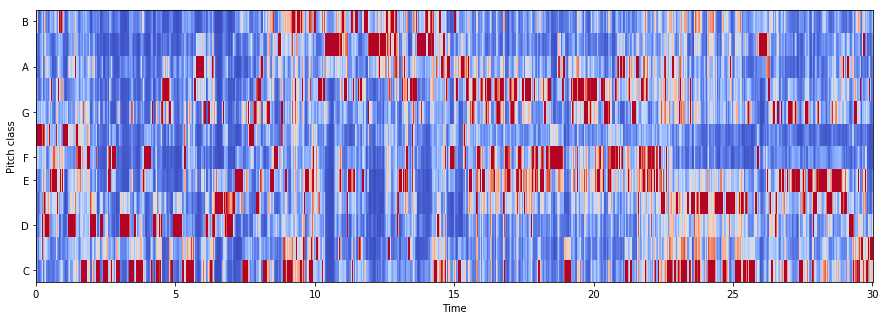

In [24]:
# Chroma Frequencies

# Loadign the file
x, sr = librosa.load(audio_path)
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')